###**1: Understanding of Image Formation Pipeline**

#####**1.1. perspective projection of a 3D cube onto a 2D image plane**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cube_points = np.array([
    [-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1],
    [-1, -1, 1], [1, -1, 1], [1, 1, 1], [-1, 1, 1]
])

# Perspective Projection Matrix
f = 1
projection_matrix = np.array([
    [f, 0, 0, 0],
    [0, f, 0, 0],
    [0, 0, 1, 0]
])

In [3]:
homogeneous_cube = np.hstack((cube_points, np.ones((8, 1))))

# Apply perspective projection
projected_points = projection_matrix @ homogeneous_cube.T
projected_points /= projected_points[2]

# Extract x and y coordinates
x_2d, y_2d = projected_points[0], projected_points[1]


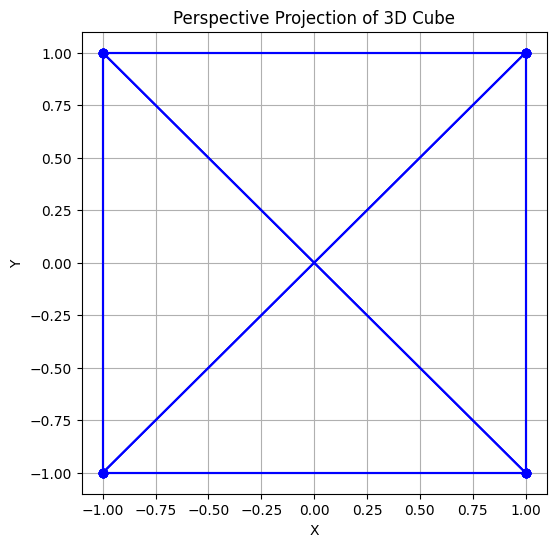

In [4]:
edges = [(0, 1), (1, 2), (2, 3), (3, 0),
         (4, 5), (5, 6), (6, 7), (7, 4),
         (0, 4), (1, 5), (2, 6), (3, 7)]

# Plot the projected cube
plt.figure(figsize=(6, 6))
for edge in edges:
    plt.plot([x_2d[edge[0]], x_2d[edge[1]]], [y_2d[edge[0]], y_2d[edge[1]]], 'bo-')

plt.title("Perspective Projection of 3D Cube")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

#####**1.2. Transformation in homogenous coordinates**

In [5]:
# Define a square in 2D space
square = np.array([
    [-1, -1], [1, -1], [1, 1], [-1, 1], [-1, -1]
])

# Convert to homogeneous coordinates
homogeneous_square = np.hstack((square, np.ones((square.shape[0], 1))))

# Transformation Matrices
theta = np.radians(30)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

scaling_matrix = np.array([
    [1.5, 0, 0],
    [0, 1.5, 0],
    [0, 0, 1]
])

translation_matrix = np.array([
    [1, 0, 2],
    [0, 1, 1],
    [0, 0, 1]
])

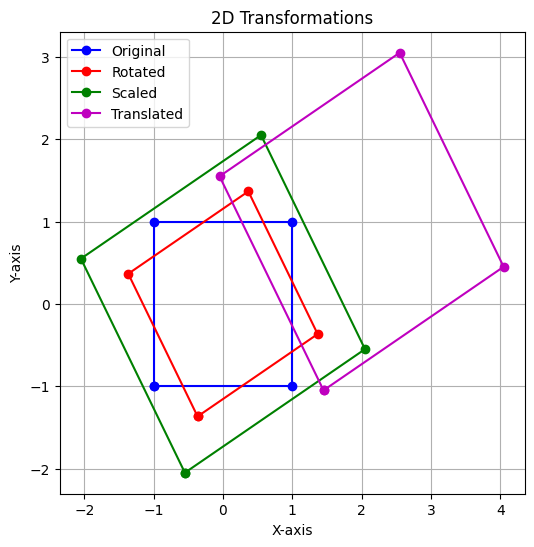

In [6]:
# Apply transformations
rotated_square = (rotation_matrix @ homogeneous_square.T).T
scaled_square = (scaling_matrix @ rotated_square.T).T
translated_square = (translation_matrix @ scaled_square.T).T

# Plot the transformations
plt.figure(figsize=(6, 6))
plt.plot(square[:, 0], square[:, 1], 'bo-', label="Original")
plt.plot(rotated_square[:, 0], rotated_square[:, 1], 'ro-', label="Rotated")
plt.plot(scaled_square[:, 0], scaled_square[:, 1], 'go-', label="Scaled")
plt.plot(translated_square[:, 0], translated_square[:, 1], 'mo-', label="Translated")

plt.legend()
plt.title("2D Transformations")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

###**2: image reading and processing along with basic matrix processing.**

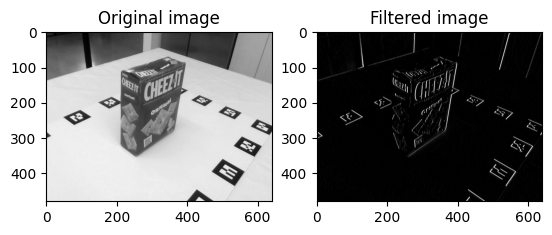

In [9]:
# -*- coding: utf-8 -*-
"""Image Filtering using OpenCV"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

# main function
if __name__ == '__main__':
    # Step 1: read the crack box image with cv2.imread
    im = cv2.imread("/content/cracker_box.jpg")

    # Step 2: use cv2.cvtColor to convert RGB image to gray scale image
    #(replace with your code)
    gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Step 3: define the filter kernel as described in the homework description as a numpy array
    #(replace with your code)
    kernel = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ], dtype=np.float32)

    # Step 4:  filter the image with the kernel
    #(replace with your code)
    output = cv2.filter2D(gray_image, -1, kernel)

    # Show result with matplotlib (no need to change code below)
    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(gray_image, cmap = 'gray')
    ax.set_title('Original image')

    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(output, cmap = 'gray')
    ax.set_title('Filtered image')

    plt.show()

###**3: Check gaussian effect on image and apply different filters**

#####**1. Apply gaussian noise**

In [10]:
def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy_image = cv2.add(image.astype(np.float32), noise)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

#####**2. Compute PSNR**

In [11]:
def compute_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

#####**3. Complete flow**

Original Image


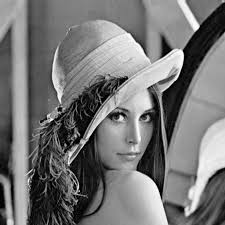

Noisy Image


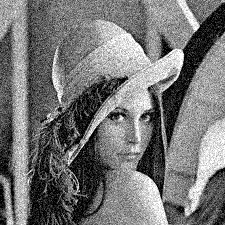

Filtered Images:
Mean filtered image


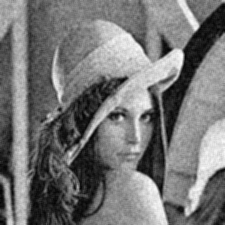

Gaussian filtered image


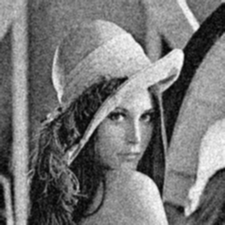

Median filtered image


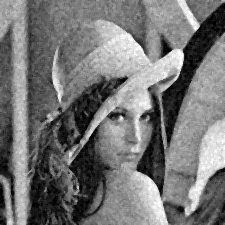

PSNR (Mean Filter): 29.97 dB
PSNR (Gaussian Filter): 29.85 dB
PSNR (Median Filter): 29.59 dB


In [14]:
from google.colab.patches import cv2_imshow

def main():
    image1 = cv2.imread("/content/download.jpg", cv2.IMREAD_GRAYSCALE)

    #1: Add Gaussian noise
    noisy_image = add_gaussian_noise(image1)

    #2: Apply Filters
    mean_filtered = cv2.blur(noisy_image, (3, 3))
    gaussian_filtered = cv2.GaussianBlur(noisy_image, (3, 3), 0)
    median_filtered = cv2.medianBlur(noisy_image, 3)

    #3: Compute PSNR
    psnr_mean = compute_psnr(image1, mean_filtered)
    psnr_gaussian = compute_psnr(image1, gaussian_filtered)
    psnr_median = compute_psnr(image1, median_filtered)

    # Display Results
    print("Original Image")
    cv2_imshow(image1)
    print("Noisy Image")
    cv2_imshow(noisy_image)
    print("Filtered Images:")
    print("Mean filtered image")
    cv2_imshow(mean_filtered)
    print("Gaussian filtered image")
    cv2_imshow(gaussian_filtered)
    print("Median filtered image")
    cv2_imshow(median_filtered)

    # Save images
    cv2.imwrite("noisy_lena.jpg", noisy_image)
    cv2.imwrite("mean_filtered.jpg", mean_filtered)
    cv2.imwrite("gaussian_filtered.jpg", gaussian_filtered)
    cv2.imwrite("median_filtered.jpg", median_filtered)

    # Print PSNR values
    print(f"PSNR (Mean Filter): {psnr_mean:.2f} dB")
    print(f"PSNR (Gaussian Filter): {psnr_gaussian:.2f} dB")
    print(f"PSNR (Median Filter): {psnr_median:.2f} dB")

if __name__ == "__main__":
    main()

###**Analysis and Comparison**

####**1. Mean Filter (Averaging Filter):**

*   Reduces noise by averaging pixel values in a local neighborhood.
*   Blurs the image significantly, resulting in a smoother but less detailed image.
*   Preserves edges less effectively.

####**2. Gaussian Filter:**

*   Uses a weighted average where closer pixels contribute more.
*   Provides better noise reduction while preserving edges compared to the mean filter.
*   Still causes some blurring but retains details better than the mean filter.

####**3. Median Filter:**

*   Replaces each pixel with the median of surrounding pixels.
*   Works well in removing salt-and-pepper noise.
*   Preserves edges better than both the mean and Gaussian filters but can introduce slight artifacts.

###**Best Filter:**

The Gaussian filter achieves a good balance between denoising and retaining edges.
